# Real-World Sales Problem

In [1]:
import pandas as pd
import os

In [2]:
data=pd.read_csv('C:\\Users\\HP\\Desktop\\RealWorld\\Sales_Folder\\Sales_Data\\Sales_April_2019.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
data.shape

(18383, 6)

### Merging all files (12 months data) from a folder and reading them using pandas

In [4]:


#Use OS for loading all files together
file_list = os.listdir('C:\\Users\\HP\\Desktop\\RealWorld\\Sales_Folder\\Sales_Data')
files=[file for file in file_list]

df = pd.DataFrame()
for file in files:
    data=pd.read_csv('C:\\Users\\HP\\Desktop\\RealWorld\\Sales_Folder\\Sales_Data\\' + file ) #same as above data reading 
    df=pd.concat([df, data])    

df.to_csv('All_Data.csv',index=False) #New file will be created merging all files and name it as 'All_Data'

In [5]:
df.shape

(186850, 6)

In [6]:
#Now read the updated dataframe
dataset=pd.read_csv('All_Data.csv')
dataset.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [7]:
dataset.shape

(186850, 6)

In [8]:
dataset['Order Date'].describe()

count         186305
unique        142396
top       Order Date
freq             355
Name: Order Date, dtype: object

In [9]:
# dataset.isnull()
dataset.isnull().sum()  #To check missing values or NaN values of every column

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
dataset.isnull(). sum(). sum()  #To find total NaN values

3270

In [11]:
# Find Specific Rows having NaN values
datasetNaN = dataset[dataset.isna().any(axis=1)]

datasetNaN.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN


### Remove NaN values (Null Values) From dataset

In [12]:
# dataset=dataset.dropna(how='any') #It will drop row having single NaN
# Drop all NaN rows
dataset=dataset.dropna(how='all')
# dataset.head(4)
dataset.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
dataset.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
dataset.shape  # 186850- 545 = 186850
#Hence all NaN values are droped

(186305, 6)

### Adding Month column and converting it from str to int

### We Have to make 'Month' column values as specific month depending on 'Order Date'

In [15]:
# Created New Column named month with all values as Ninad
dataset['Month']='Ninad'
dataset.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Ninad
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Ninad


In [16]:
dataset['Month']=dataset['Order Date'].str[0:2] 
#slice only 1st 2 string values from Each row of column Order Data, as it is for month
dataset.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [17]:
#Cleaning data
# Removing Error 'Invalid literal for int() with base 10 : "Or" '

dataset=dataset[dataset['Order Date'].str[0:2]!='Or']
dataset.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [18]:
#Converting str to int of column 'Month'
dataset['Month']=dataset['Order Date'].str[0:2] 
dataset['Month']=dataset['Month'].astype('int32') 
dataset.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


In [19]:
#Cleaning data
#Converting columns Quatity and Price from str to int
dataset['Quantity Ordered']= pd.to_numeric(dataset['Quantity Ordered'])  #Make int
dataset['Price Each']=pd.to_numeric(dataset['Price Each']) #Make float
dataset.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


In [20]:
#### Look as problem and finding Solutions depending on problem
#### We want Sales , so Quantity Ordered x Price Each = Sales

In [21]:
#Adding Sales Column 
#Remember keep Both Column values as int
# If any of them is str , then clean it
dataset['Sales']=dataset['Quantity Ordered']*dataset['Price Each']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding a Location column

In [22]:
#Another method to do the above step 

def get_city(address):
    return address.split(',')[1]

#To get a state
def get_state(address):
    return address.split(',')[2].split(' ')[1]


dataset['Location']=dataset['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

dataset.head()

#We have location, Now we can answer 2nd question

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [23]:
# #We have to grab a particular value (word) from Purchase Address column 
# #use ' .apply()'  -->allows to run any func on dataframe 
# #split Purchase Address col on ' , '
# dataset['Location']=dataset['Purchase Address'].apply(lambda x: x.split(',')[1]) # 1 beacuse we want city
# #x value is cell content
# #for x value split whole part by commas(',')
# dataset.head()

In [24]:
dataset['Location'].describe()

count                  185950
unique                     10
top        San Francisco (CA)
freq                    44732
Name: Location, dtype: object

#### Question1 : Best month for sale and how much was earned in that month ???

In [25]:
result1=dataset.groupby('Month').sum()

In [26]:
# Visualizing Our Result using matplot

import matplotlib.pyplot as plt

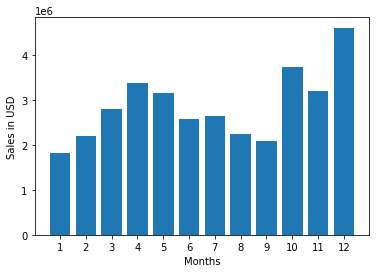

In [27]:
months=range(1,13)  #13 is exclusive 

# months is X variable
# result is Y variable

plt.bar(months,result1['Sales'])

plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')

plt.show()

#### Question2 : Which city(Location) has the highest number of Sales ???

In [28]:
result2=dataset.groupby('Location').sum()
result2

,Quantity Ordered,Price Each,Month,Sales
Location,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


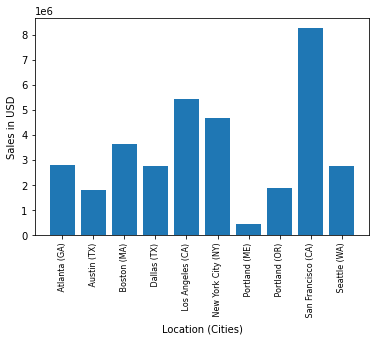

In [29]:
 #all unique values from Location column
# city=dataset['Location'].unique()  #x and y data are not in the same order
#But there is inconsistency in result( graph shows different and data shows different)

city=[cities for cities,df in dataset.groupby('Location')]
# city is X variable
# result is Y variable

plt.bar(city,result2['Sales'])

plt.xticks(city,rotation='vertical',size=8)  #font size=8
#rotaion=vertical --> turn x variables  vertically
plt.xlabel('Location (Cities)')
plt.ylabel('Sales in USD')

plt.show()

In [30]:
#San fransisco is the city (location) having highest sales

#### Question3 : What time should we display advertisements to maximize likelihood of customers buying products ??? 

##### Using 'to_datetime' Method in 'Order Date' column

In [31]:
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [32]:
# Adding 'Hour' column to data

dataset['Hour']=dataset['Order Date'].dt.hour
dataset['Minute']=dataset['Order Date'].dt.minute
# dataset['day']=dataset['Order Date'].dt.day
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [33]:
# dataset.drop(['day'],inplace=True,axis=1)
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [34]:
# hour=dataset['Hour'].unique()
#or
# hours = [hour for hour, df in dataset.groupby('Hour')]

# result3=dataset.groupby(['Hour']).count()
#result3

## Now we will use a line chart
# plt.plot(hours , result3)
# dataset.groupby(['Hour']).count()
# plt.show()

#### Question4 : What products are most often sold together ???

In [35]:
df=dataset[dataset['Order ID'].duplicated(keep=False)]  #Use Shift + Tab to get recommendations in code
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15060\2891708847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [36]:
#Now count pairs which comes together from grouped column 

from itertools import combinations
from collections import Counter

In [37]:
count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter (combinations(row_list,2)))  #2 is the number of pairs, can be changed to 3,4,5...

#Not in readble format
# count.most_common(10)

#for readable

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question5 : What products are sold the most & Why they are sold the most ???

In [38]:
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [39]:
product_group=dataset.groupby('Product')
# product_group.sum()

#We can use Quality ordered to get best result
quantity_ordered=product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

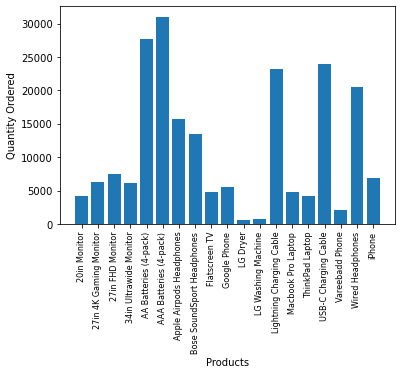

In [40]:
# X will be Products and Y will be Quality Ordered
plt.bar(products,quantity_ordered)

#Do rotation
plt.xticks(products,rotation='vertical',size=8)  #font size=8
#rotaion=vertical --> turn x variables  vertically
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15060\3507637742.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)  #font size=8


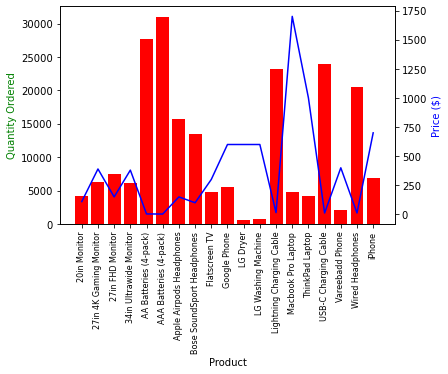

In [41]:
prices=dataset.groupby('Product').mean()['Price Each']

fig,ax1 =plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='r')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')

#Do rotation
ax1.set_xticklabels(products,rotation='vertical',size=8)  #font size=8
#rotaion=vertical --> turn x variables  vertically

plt.show()